## Autoevaluación 7


### Gradient Descent

#### Pregunta 1

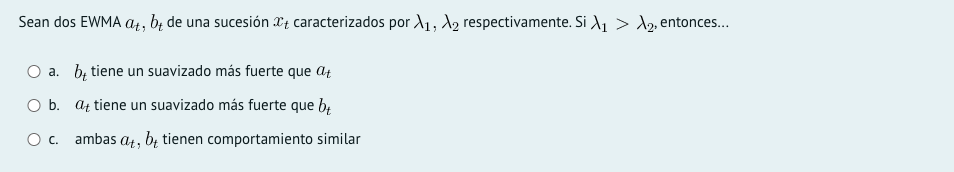

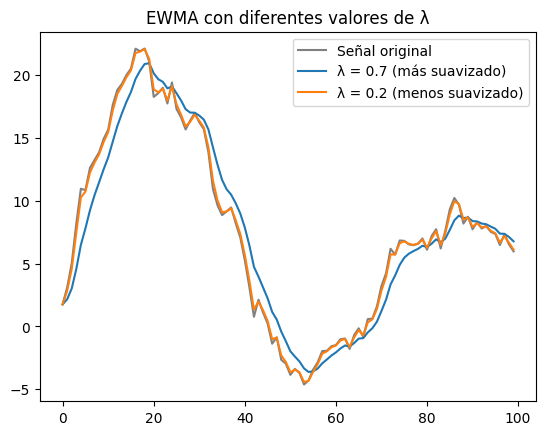

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Señal original ruidosa
np.random.seed(0)
x = np.cumsum(np.random.randn(100)) + 10 * np.sin(np.linspace(0, 3*np.pi, 100))

# EWMA
def ewma(x, lam):
    a = np.zeros_like(x)
    a[0] = x[0]
    for t in range(1, len(x)):
        a[t] = lam * a[t-1] + (1 - lam) * x[t]
    return a

# Lambda altos = menos suavizado | Lambda bajos = más suavizado
a_t = ewma(x, 0.7)  # más suavizado
b_t = ewma(x, 0.2)  # menos suavizado

plt.plot(x, label="Señal original", color='gray')
plt.plot(a_t, label="λ = 0.7 (más suavizado)") 
plt.plot(b_t, label="λ = 0.2 (menos suavizado)")
plt.legend()
plt.title("EWMA con diferentes valores de λ")
plt.show()

- Cuando λ es mayor (por ejemplo 0.7), el EWMA responde más lentamente → más suavizado.
- Cuando λ es menor (por ejemplo 0.2), el EWMA sigue más de cerca a la señal → menos suavizado.

✅ Esto valida que si λ₁ > λ₂, entonces aₜ tiene un suavizado más fuerte que bₜ. 

#### Pregunta 2

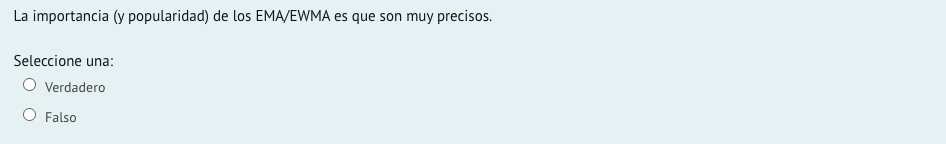

**Falso**

La importancia y popularidad de los métodos EMA/EWMA (Exponential Moving Average) no radica en que sean muy precisos, sino en que son:
- Sencillos de implementar
- Eficientes computacionalmente (no requieren guardar una ventana de datos)
- Robustos al ruido
- Muy útiles para suavizar series temporales y detectar tendencias o cambios de nivel

Pero no son necesariamente los más precisos para tareas de predicción. Métodos más complejos (ARIMA, LSTM, Prophet, etc.) pueden ser más precisos, aunque más costosos de entrenar.

#### Pregunta 3

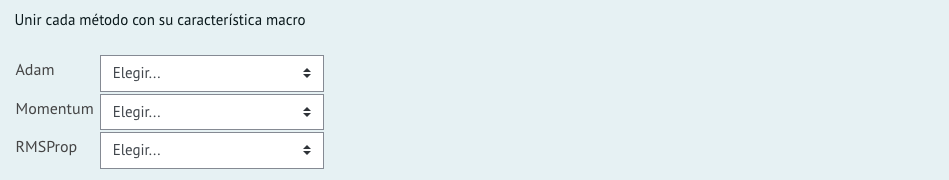

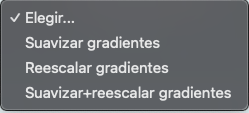

- **Adam → Suavizar + Reescalar gradientes:** Porque Adam combina Momentum (suaviza) y RMSProp (reescala) internamente.
- **Momentum → Suavizar gradientes:** Acumula el gradiente exponencialmente para avanzar en direcciones consistentes.
- **RMSProp → Reescalar gradientes:** Ajusta dinámicamente la tasa de aprendizaje dividiendo por una media cuadrática móvil del gradiente.

#### Pregunta 4

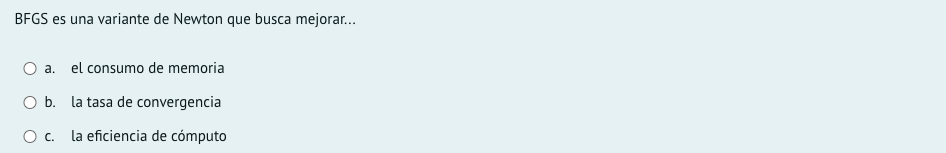

El `método BFGS (Broyden-Fletcher-Goldfarb-Shanno)` es un algoritmo cuasi-Newton que busca aproximar la matriz Hessiana inversa sin tener que calcularla explícitamente, lo cual es costoso en tiempo y memoria.
- Los métodos de Newton calculan y almacenan la Hessiana, lo que implica un costo de $\mathcal{O}(n^2)$ en memoria y $\mathcal{O}(n^3)$ en cómputo.
- `BFGS` evita este costo al actualizar una aproximación de la inversa de la Hessiana utilizando información de gradientes.

Entonces:
- **Reduce costo computacional**, pero no necesariamente el uso de memoria.
- No mejora la tasa de convergencia comparado con Newton, pero tiene mejor costo-beneficio.
- Su enfoque está más en **eficiencia de cómputo** y escalabilidad.

#### Pregunta 5

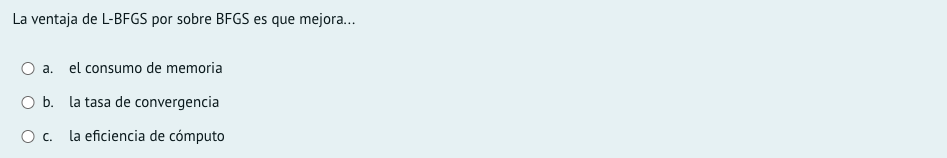

`L-BFGS (Limited-memory BFGS)` es una variante de `BFGS` especialmente diseñada para **reducir el uso de memoria** en problemas de gran escala. En lugar de almacenar y actualizar una aproximación completa de la matriz Hessiana (que tiene un costo de almacenamiento cuadrático), `L-BFGS` solo guarda un número limitado de vectores que representan la información necesaria de iteraciones recientes.

Esto permite aplicar métodos quasi-Newton en contextos donde la matriz Hessiana sería demasiado grande para almacenarse o invertirse.

#### Pregunta 6

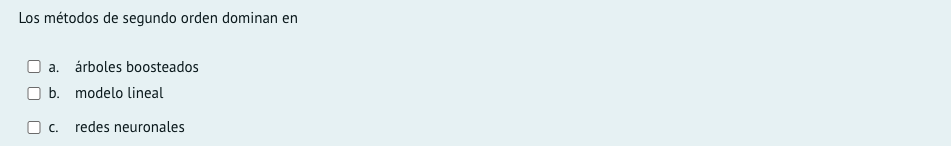

Los métodos de segundo orden dominan en el entrenamiento de modelos como `XGBoost`, `LightGBM` o `CatBoost`, que se basan en **árboles de decisión boosteados**. Estos algoritmos utilizan información de la segunda derivada (Hessiana) de la función de pérdida para realizar una optimización más eficiente y precisa en cada iteración, mejorando la selección de splits y la convergencia.
En cambio, en redes neuronales y modelos lineales, suelen preferirse métodos de primer orden como SGD, Adam o RMSProp por su eficiencia computacional y escalabilidad.